<a href="https://colab.research.google.com/github/Geektrovert/PyFML/blob/master/DeepLearningWithPython/DogsVsCats(Overfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs. Cats Image Classification

This notebook is for practising the examples in chapter **5.2** of [**Deep Learning with Python**](https://www.manning.com/books/deep-learning-with-python)

**NOTE:** The 2,000 images used in this exercise are excerpted from the [**"Dogs vs. Cats" dataset**](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, a subset of the full dataset will be used to decrease training time for educational purposes.

## Downloading the data

Here I'm using the data of Image Classification Part 1 from Google's ML Crash Course where the already made a subset of the original dataset.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./cats_and_dogs_filtered.zip

--2019-08-01 09:14:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   120MB/s    in 0.5s    

2019-08-01 09:14:49 (120 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip data

In [0]:
import os
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

## Delete zip files

In [3]:
!rm cats_and_dogs_filtered.zip
!ls -alh cats_and_dogs_filtered/

total 20K
drwxr-xr-x 4 root root 4.0K Aug  1 09:14 .
drwxr-xr-x 1 root root 4.0K Aug  1 09:14 ..
drwxr-xr-x 4 root root 4.0K Aug  1 09:14 train
drwxr-xr-x 4 root root 4.0K Aug  1 09:14 validation
-rw-r--r-- 1 root root  140 Aug  1 09:14 vectorize.py


## Set up path variables

In [0]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Filesnames

Let's see what the filenames look like

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.610.jpg', 'cat.336.jpg', 'cat.792.jpg', 'cat.137.jpg', 'cat.184.jpg', 'cat.418.jpg', 'cat.429.jpg', 'cat.191.jpg', 'cat.775.jpg', 'cat.36.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


## Size of train and validation set

Let's see how much data we are working with

In [6]:
print("Total number of cat images in Training set: " + str(len(os.listdir(train_cats_dir))))
print("Total number of dog images in Training set: " + str(len(os.listdir(train_dogs_dir))))
print("Total number of cat images in Validation set: " + str(len(os.listdir(validation_cats_dir))))
print("Total number of dog images in Validation set: " + str(len(os.listdir(validation_dogs_dir))))

Total number of cat images in Training set: 1000
Total number of dog images in Training set: 1000
Total number of cat images in Validation set: 500
Total number of dog images in Validation set: 500


## Visualize dataset

Let's see how our cats and doggos look like.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for data visualization graph. We will show a 7x7 grid of pictures
nrows = 7
ncols = 7

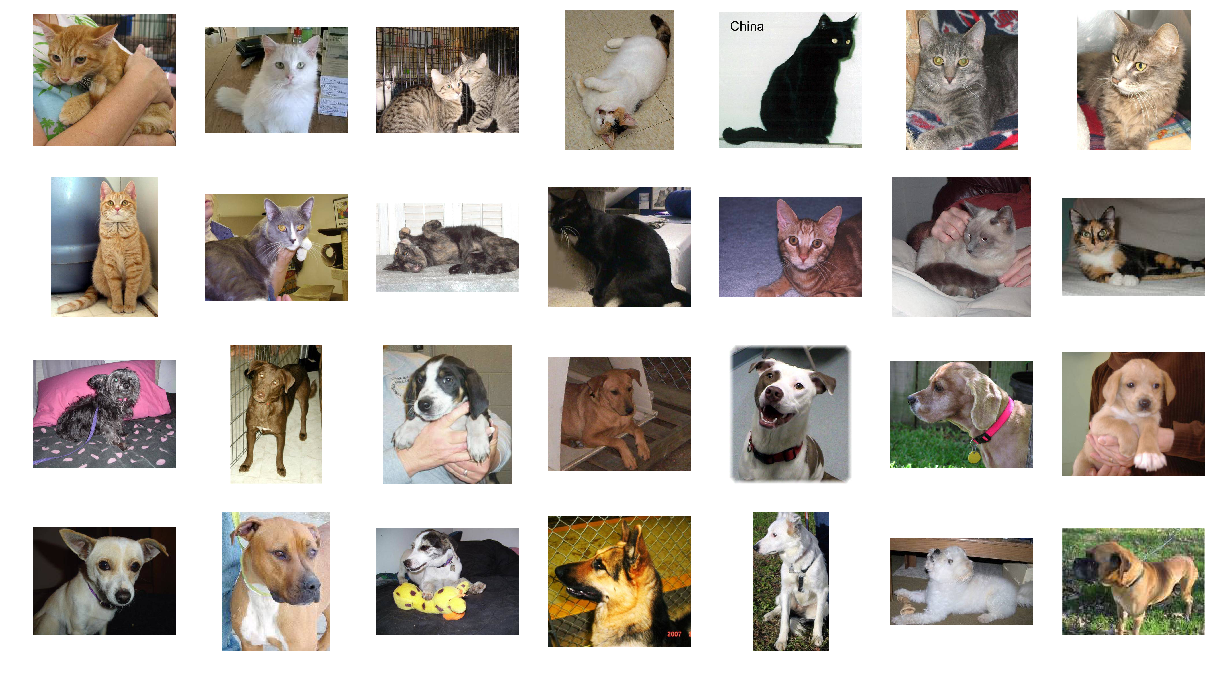

In [8]:
# Set up matplotlib fig, and size it to fit 7x7 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index = 0
pic_index += 14
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-14:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-14:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Build ConvNet model

Let's build our model with the following layers

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0801 09:15:03.250241 140012187735936 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Visualize Model's Architectue

Let’s look at how the dimensions of the feature maps change with every successive layer:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

## Compilation

For the compilation step, we’ll go with the RMSprop optimizer, where we're setting initial learning rate to 0.001 but RMSprop will automate the tuning of learning rate by itself as necessary while training our model. As this is a birany classification problem, we ended the network with a single sigmoid unit and so we’ll use binary crossentropy as the loss.

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

W0801 09:26:14.662260 140012187735936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data preprocessing

Data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. The steps for getting it into the network are roughly as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images should be scaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir, 
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

In [14]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50,
                             verbose=2)

Epoch 1/30
100/100 - 14s - loss: 0.6978 - acc: 0.5490 - val_loss: 0.6642 - val_acc: 0.6270
Epoch 2/30
100/100 - 10s - loss: 0.6270 - acc: 0.6515 - val_loss: 0.5884 - val_acc: 0.6990
Epoch 3/30
100/100 - 10s - loss: 0.5666 - acc: 0.7140 - val_loss: 0.6055 - val_acc: 0.6580
Epoch 4/30
100/100 - 10s - loss: 0.5173 - acc: 0.7415 - val_loss: 0.5539 - val_acc: 0.7210
Epoch 5/30
100/100 - 10s - loss: 0.4700 - acc: 0.7780 - val_loss: 0.5478 - val_acc: 0.7260
Epoch 6/30
100/100 - 10s - loss: 0.4259 - acc: 0.7965 - val_loss: 0.5634 - val_acc: 0.7150
Epoch 7/30
100/100 - 10s - loss: 0.3965 - acc: 0.8245 - val_loss: 0.5477 - val_acc: 0.7160
Epoch 8/30
100/100 - 10s - loss: 0.3520 - acc: 0.8545 - val_loss: 0.6230 - val_acc: 0.6940
Epoch 9/30
100/100 - 10s - loss: 0.3166 - acc: 0.8695 - val_loss: 0.6904 - val_acc: 0.6710
Epoch 10/30
100/100 - 10s - loss: 0.2822 - acc: 0.8870 - val_loss: 0.7076 - val_acc: 0.6900
Epoch 11/30
100/100 - 10s - loss: 0.2526 - acc: 0.8990 - val_loss: 0.6060 - val_acc: 0.70

## Save model

In [0]:
model.save('cats_n_dogs_overfit.h5')

## Visualize Performance

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

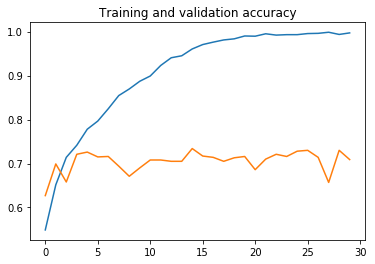

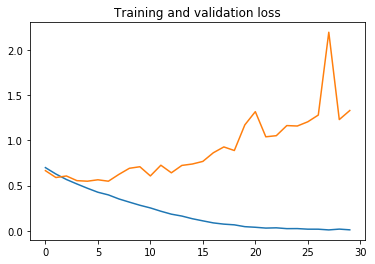

In [16]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

This clearly shows that our model overfits